In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vg_data = pd.read_csv('https://raw.githubusercontent.com/modernpacifist/engineering-of-machine-learning-urfu/master/python-pro-level/Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv')

Text(0, 0.5, 'Overall sells volume')

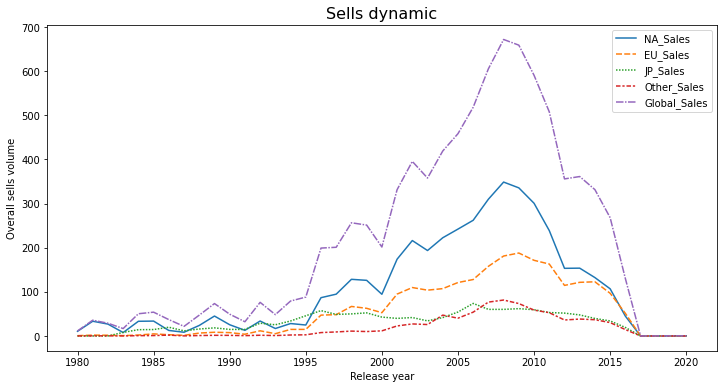

In [3]:
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Sells dynamic', fontsize=16)
lineplot.set_xlabel('Release year')
lineplot.set_ylabel('Overall sells volume')

In [4]:
melb_data = pd.read_csv('https://raw.githubusercontent.com/modernpacifist/engineering-of-machine-learning-urfu/master/python-pro-level/Datasets/melb_data.csv')

Text(0, 0.5, 'Object type')

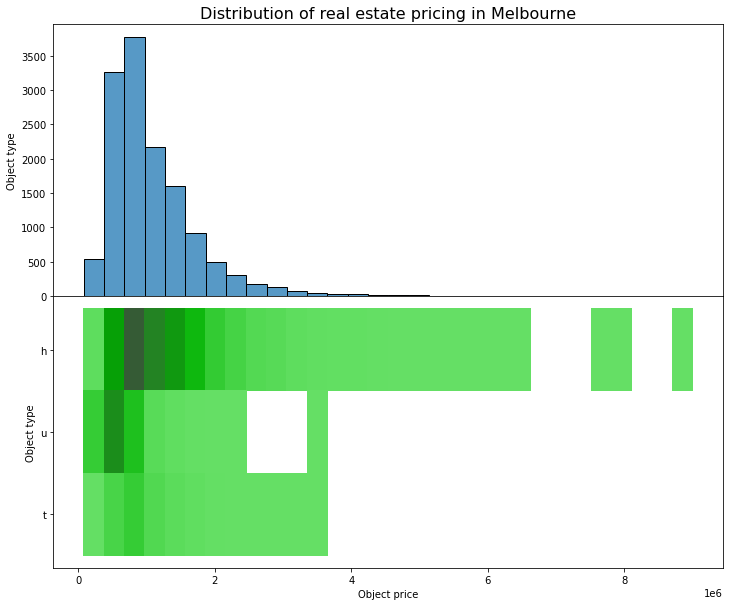

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Distribution of real estate pricing in Melbourne', fontsize=16)
histplot1.set_xlabel('Object price')
histplot1.set_ylabel('Object type')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Object price')
histplot2.set_ylabel('Object type')

Text(0, 0.5, 'Wings length')

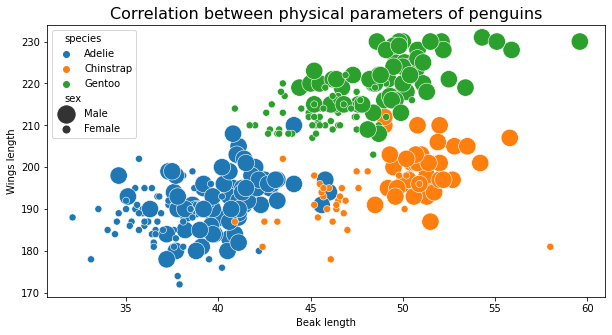

In [6]:
penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Correlation between physical parameters of penguins', fontsize=16)
scatterplot.set_xlabel('Beak length')
scatterplot.set_ylabel('Wings length')

In [7]:
game_of_thrones_df = pd.read_csv('https://raw.githubusercontent.com/modernpacifist/engineering-of-machine-learning-urfu/master/python-pro-level/Datasets/character-deaths.csv')

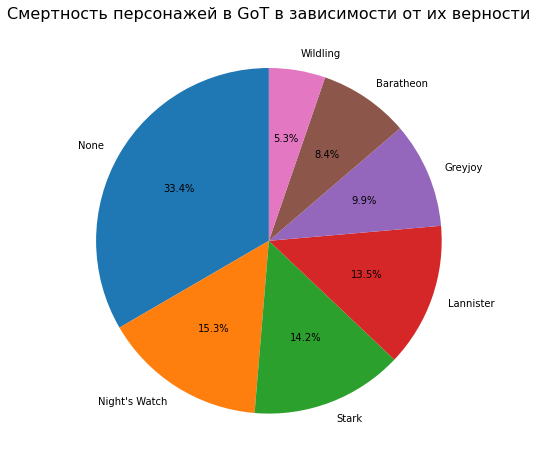

In [8]:
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

In [9]:
amazon_data = pd.read_csv('/content/drive/MyDrive/Datasets/amazon_com.csv')

In [10]:
def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name

<ipython-input-11-4c32e0f42c79>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')


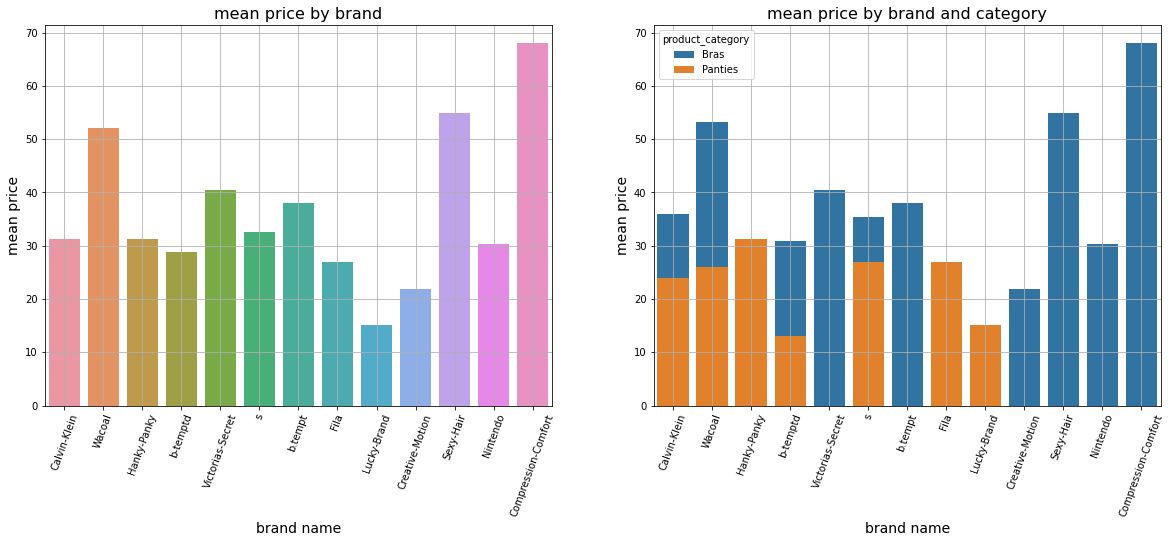

In [11]:
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('mean price by brand', fontsize=16);
barplot1.set_xlabel('brand name', fontsize=14);
barplot1.set_ylabel('mean price', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('mean price by brand and category', fontsize=16);
barplot2.set_xlabel('brand name', fontsize=14);
barplot2.set_ylabel('mean price', fontsize=14);
barplot2.grid()

In [12]:
tweets_df = pd.read_csv('https://raw.githubusercontent.com/modernpacifist/engineering-of-machine-learning-urfu/master/python-pro-level/Datasets/biden_trump_tweets.csv',
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )

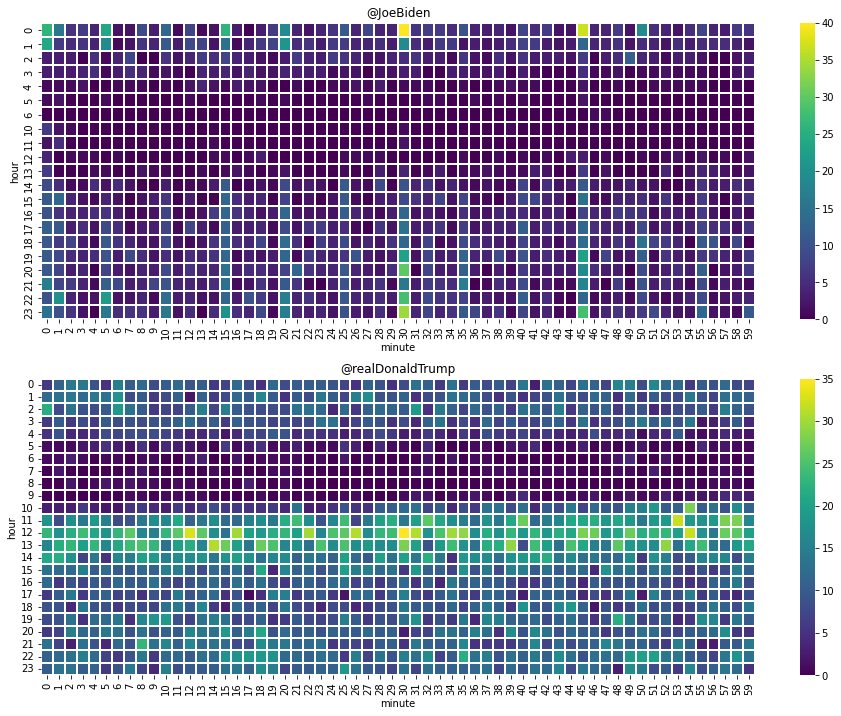

In [13]:
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('minute');
jb_heatmap.set_ylabel('hour');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('minute');
dt_heatmap.set_ylabel('hour');

In [14]:
citibike_df = pd.read_csv('/content/drive/MyDrive/Datasets/citibike-tripdata.csv')

Text(0, 0.5, 'User type')

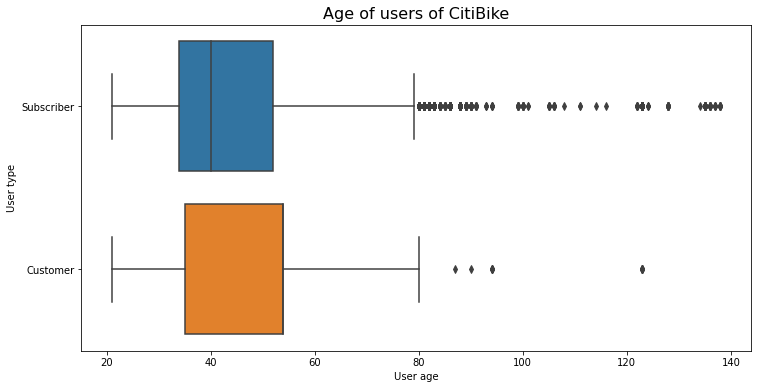

In [15]:
citibike_df['age'] = 2023 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Age of users of CitiBike', fontsize=16)
boxplot.set_xlabel('User age')
boxplot.set_ylabel('User type')

# 5.3.3

In [2]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/modernpacifist/engineering-of-machine-learning-urfu/master/python-pro-level/Datasets/covid_data.csv')

In [3]:
covid_data

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,05/29/2021,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,05/29/2021,Zeeland,Netherlands,29147.0,245.0,0.0
306426,05/29/2021,Zhejiang,China,1364.0,1.0,1324.0
306427,05/29/2021,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0


In [4]:
vaccinations_data = pd.read_csv('https://raw.githubusercontent.com/modernpacifist/engineering-of-machine-learning-urfu/master/python-pro-level/Datasets/country_vaccinations.csv')

In [5]:
vaccinations_data = vaccinations_data[
    [
        'country', 'date', 'total_vaccinations', 
        'people_vaccinated', 'people_vaccinated_per_hundred',
        'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
        'daily_vaccinations', 'vaccines'
    ]
]

In [6]:
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [7]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [8]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [9]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [10]:
covid_data.head()

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0


In [11]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [12]:
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [14]:
display(covid_data['date'].min().strftime("%Y-%m-%d"))
display(covid_data['date'].max().strftime("%Y-%m-%d"))

'2020-01-22'

'2021-05-29'

In [15]:
display(vaccinations_data['date'].min().strftime("%Y-%m-%d"))
display(vaccinations_data['date'].max().strftime("%Y-%m-%d"))

'2020-12-02'

'2021-09-06'

In [16]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 11337 to 17645
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             86785 non-null  datetime64[ns]
 1   country          86785 non-null  object        
 2   confirmed        86785 non-null  float64       
 3   deaths           86785 non-null  float64       
 4   recovered        86785 non-null  float64       
 5   active           86785 non-null  float64       
 6   daily_confirmed  86564 non-null  float64       
 7   daily_deaths     86564 non-null  float64       
 8   daily_recovered  86564 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 6.6+ MB


In [17]:
covid_df = pd.merge(covid_data, vaccinations_data, how='left', on=['date', 'country'])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [18]:
covid_df['date'].min()

Timestamp('2020-01-22 00:00:00')

In [19]:
covid_df['date'].max()

Timestamp('2021-05-29 00:00:00')

In [20]:
mask = (covid_df['date'] >= '2020-01-22') & (covid_df['date'] <= '2021-05-29')
covid_df = covid_df[mask]

In [24]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [79]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100

In [80]:
covid_df.replace([np.inf], np.nan, inplace=True)

In [81]:
us_max_death_rate = covid_df.groupby('country')['death_rate'].max()['United States']
display(us_max_death_rate)

7.18954248366013

In [82]:
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [83]:
ru_mean_recover_rate = covid_df.groupby('country')['recover_rate'].mean()['Russia']
display(ru_mean_recover_rate)

67.06273489477655

# 5.3.4

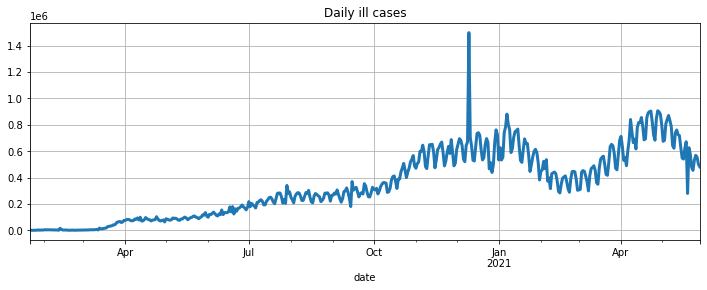

In [87]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Daily ill cases',
    grid = True,
    lw=3
)

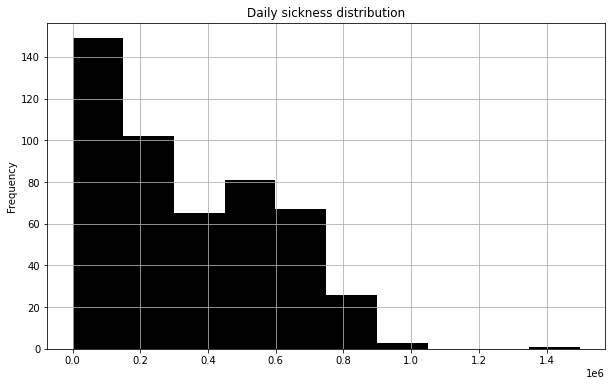

In [89]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Daily sickness distribution',
    grid = True,
    color = 'black',
    bins=10
);

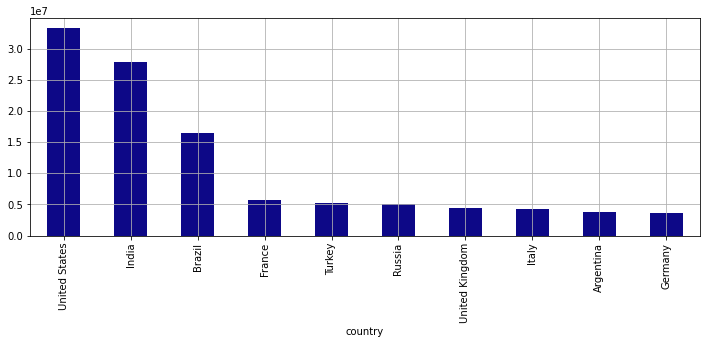

In [90]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

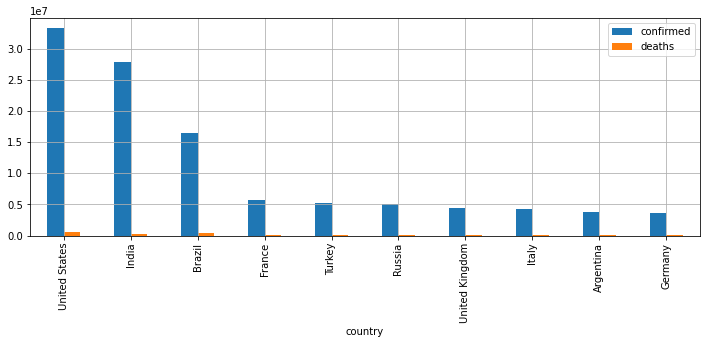

In [92]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

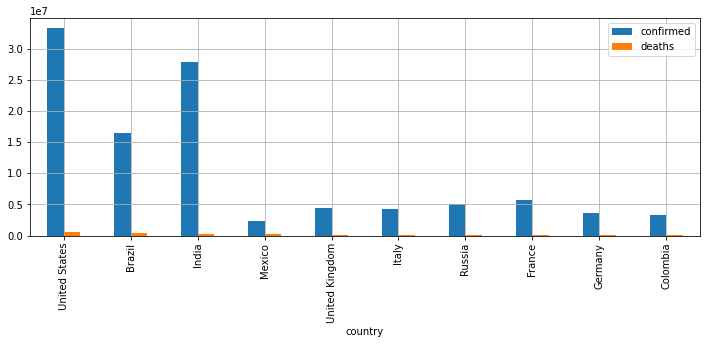

In [95]:
grouped_country1 = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country1 = grouped_country1.nlargest(10, columns=['deaths'])
grouped_country1.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

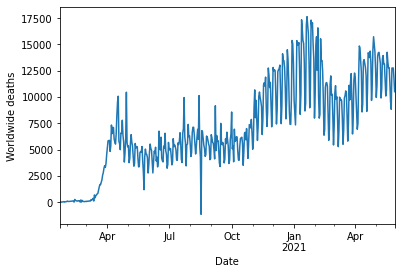

In [98]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line', xlabel='Date', ylabel='Worldwide deaths');

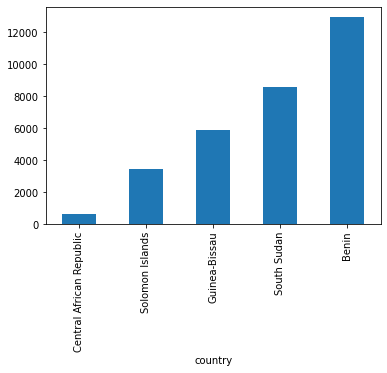

In [99]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');